## 1. The Goal of This Project 

## All Packages you need for this 

In [1]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import sklearn
import xlrd

# Pre Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Error Metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regressors
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

#Cross Validation 
from sklearn.model_selection import GridSearchCV

## 2. Load The Data into a Pandas Frame

In [2]:
#For Excel file 
df= pd.read_excel('pedict of bod.xlsx')

# 3. Perform Data Exploratory Analysis
##   Pandas Routine 


In [3]:
df

,date,stage,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod
0,2018-03-01 00:00:00,influent,17.0,7.5,610.0,355.0,1460.0,310.0,n
1,17/1/2018,influent,14.5,7.8,530.0,275.0,1453.0,255.0,0.723944
2,27/1/2018,influent,13.7,7.4,730.0,380.0,1813.0,320.0,0.752727
3,2018-01-02 00:00:00,influent,14.0,6.9,675.0,385.0,1520.0,340.0,0.815789
4,2018-08-02 00:00:00,influent,17.6,6.8,710.0,395.0,1593.0,350.0,0.977403
...,...,...,...,...,...,...,...,...,...
263,NaN,influent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,influent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,influent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,influent,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check For Missing Data 

In [4]:
print(df.isnull().sum().sort_values(ascending=False))

TSS                          155
The efficiency of the bod    154
TDS                          154
BOD                          154
COD                          154
PH                           154
temp                         154
date                         154
stage                          0
dtype: int64


### Drop Rows with None Values 

In [5]:
df=df.dropna()
df

,date,stage,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod
0,2018-03-01 00:00:00,influent,17.0,7.50,610.0,355.0,1460.0,310.0,n
1,17/1/2018,influent,14.5,7.80,530.0,275.0,1453.0,255.0,0.723944
2,27/1/2018,influent,13.7,7.40,730.0,380.0,1813.0,320.0,0.752727
3,2018-01-02 00:00:00,influent,14.0,6.90,675.0,385.0,1520.0,340.0,0.815789
4,2018-08-02 00:00:00,influent,17.6,6.80,710.0,395.0,1593.0,350.0,0.977403
...,...,...,...,...,...,...,...,...,...
109,2020-05-07 00:00:00,influent,28.4,6.82,704.0,410.0,1315.0,372.0,0.744966
110,2020-12-07 00:00:00,influent,25.5,6.93,737.0,310.0,1260.0,345.0,0.921951
111,19/7/2020,influent,26.1,7.36,610.0,340.0,2330.0,278.0,0.832258
112,19/8/2020,influent,28.9,7.27,650.0,321.0,1130.0,790.0,0.876471


### Correct Index

In [6]:
df=df.reset_index(drop=True)
df=df[1:]
df

,date,stage,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod
1,17/1/2018,influent,14.5,7.80,530.0,275.0,1453.0,255.0,0.723944
2,27/1/2018,influent,13.7,7.40,730.0,380.0,1813.0,320.0,0.752727
3,2018-01-02 00:00:00,influent,14.0,6.90,675.0,385.0,1520.0,340.0,0.815789
4,2018-08-02 00:00:00,influent,17.6,6.80,710.0,395.0,1593.0,350.0,0.977403
5,14/2/2018,influent,13.8,6.90,610.0,390.0,1221.0,345.0,0.802532
...,...,...,...,...,...,...,...,...,...
108,2020-05-07 00:00:00,influent,28.4,6.82,704.0,410.0,1315.0,372.0,0.744966
109,2020-12-07 00:00:00,influent,25.5,6.93,737.0,310.0,1260.0,345.0,0.921951
110,19/7/2020,influent,26.1,7.36,610.0,340.0,2330.0,278.0,0.832258
111,19/8/2020,influent,28.9,7.27,650.0,321.0,1130.0,790.0,0.876471


### Describe Your Data


In [7]:
df.describe()

,temp,PH,COD,BOD,TDS,TSS
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,22.740179,7.033214,671.285714,386.321429,1237.535714,341.428571
std,4.820386,0.498770,149.533715,84.062527,326.834336,110.710621
min,13.700000,3.670000,60.000000,130.000000,111.000000,93.000000
25%,18.175000,6.800000,610.000000,337.000000,1032.500000,250.000000
50%,23.550000,7.100000,690.000000,390.000000,1236.000000,345.000000
75%,27.050000,7.280000,752.500000,430.000000,1432.000000,406.000000
max,34.000000,8.630000,1040.000000,570.000000,2330.000000,790.000000


In [8]:
df['stage'].values

array(['influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influe

> All the Column has the same Value  so we will drop it

#### Drop Specific Columns

In [9]:
df=df.drop(['stage'], 1)
df

,date,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod
1,17/1/2018,14.5,7.80,530.0,275.0,1453.0,255.0,0.723944
2,27/1/2018,13.7,7.40,730.0,380.0,1813.0,320.0,0.752727
3,2018-01-02 00:00:00,14.0,6.90,675.0,385.0,1520.0,340.0,0.815789
4,2018-08-02 00:00:00,17.6,6.80,710.0,395.0,1593.0,350.0,0.977403
5,14/2/2018,13.8,6.90,610.0,390.0,1221.0,345.0,0.802532
...,...,...,...,...,...,...,...,...
108,2020-05-07 00:00:00,28.4,6.82,704.0,410.0,1315.0,372.0,0.744966
109,2020-12-07 00:00:00,25.5,6.93,737.0,310.0,1260.0,345.0,0.921951
110,19/7/2020,26.1,7.36,610.0,340.0,2330.0,278.0,0.832258
111,19/8/2020,28.9,7.27,650.0,321.0,1130.0,790.0,0.876471


## Seaborn Routine

### Heat Map

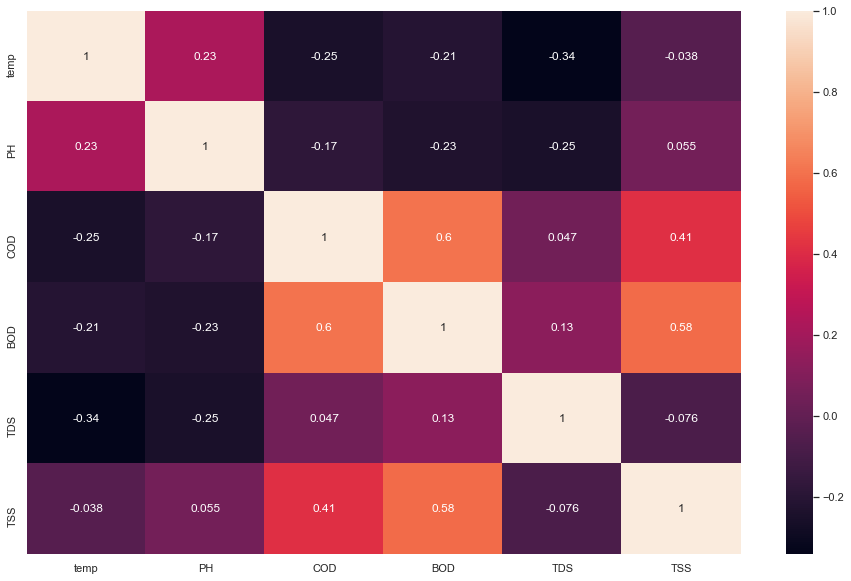

In [10]:
plt.figure(figsize = (16,10))
sns_plot=sns.heatmap(df.corr(),annot= True)
plt.show()

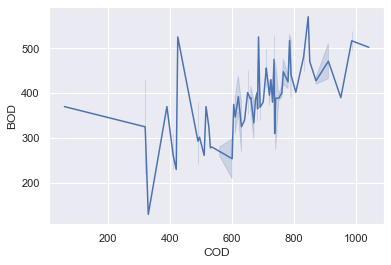

In [11]:
sns_plot = sns.lineplot(x='COD', y='BOD', data=df)


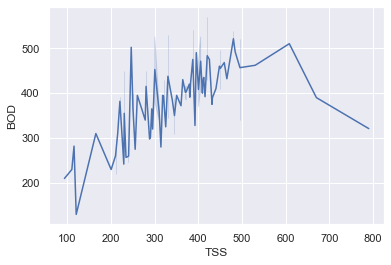

In [12]:
sns_plot = sns.lineplot(x='TSS', y='BOD', data=df)


> yes  yes  ... All Females Survived Except one 

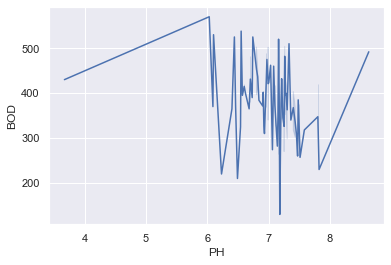

In [17]:
sns_plot = sns.lineplot(x='PH', y='BOD', data=df)


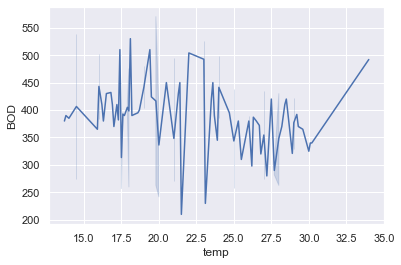

In [18]:
sns_plot = sns.lineplot(x='temp', y='BOD', data=df)

# 4. Data Preprocessing


## Splitting Data 

In [19]:
y=df['BOD']
X=df.drop(['BOD','date'],1)

In [22]:
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.1,random_state=440)

## Standardization

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
np.std(X_train)

1.0

# 5. Training Process

In [29]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)

reg2.fit(X_train, y_train)
pred2=reg2.predict(X_test)


In [30]:
print(' Mean Squared Error :', mean_squared_error(y_test,pred2))
print(' Mean Absoulte Error :', mean_absolute_error(y_test,pred2))
print(' R2 Score :', r2_score(y_test,pred2))

 Mean Squared Error : 383.61410000000006
 Mean Absoulte Error : 16.74666666666667
 R2 Score : 0.9125780715733767


In [31]:
preds=np.round(pred2)
err=abs(y_test-pred2)
Preds=pd.DataFrame(preds)
Actual=pd.DataFrame(y_test)

Error =pd.DataFrame(err)
Actual.reset_index(inplace=True)
Preds.reset_index(inplace=True)
Error.reset_index(inplace=True)
Result = pd.concat([Actual, Preds,Error], axis=1)

Result=Result.drop(['index'],1)
Result.columns=['Actual BOD','Predicted BOD', "Error"]
Result =Result.sort_values(by=['Actual BOD'])
Result.reset_index(inplace=True)
Result


,index,Actual BOD,Predicted BOD,Error
0,6,230.0,241.0,11.05
1,9,260.0,269.0,9.00
2,1,310.0,274.0,36.00
3,8,380.0,406.0,26.29
4,0,385.0,390.0,5.46
5,7,385.0,394.0,9.29
6,4,392.0,389.0,3.12
7,11,395.0,421.0,26.20
8,2,400.0,376.0,24.10
9,5,420.0,410.0,10.50


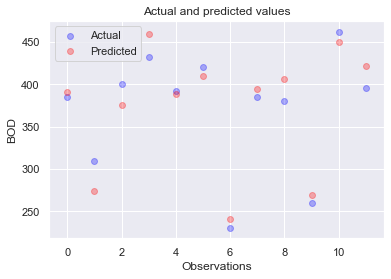

In [32]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
y_pred=pred2
ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('BOD')
plt.legend()
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


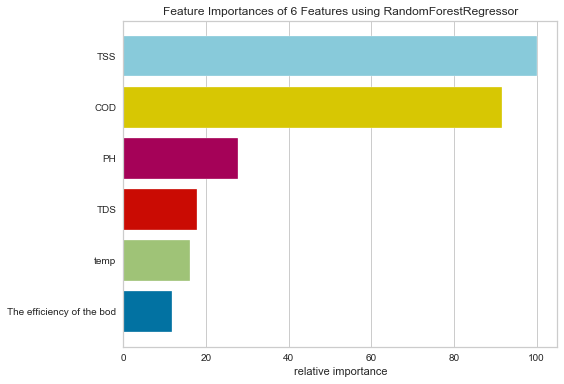

In [33]:
from yellowbrick.model_selection import FeatureImportances
model=reg2
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

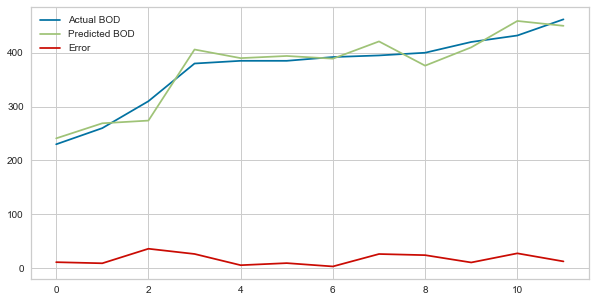

In [34]:
Result.plot(x=Result.index.name, y=['Actual BOD','Predicted BOD','Error'],figsize=(10,5), grid=True  )